Question 1: - Write a program that takes a string as input, and counts the frequency of each word in the string, there might
be repeated characters in the string. Your task is to find the highest frequency and returns the length of the
highest-frequency word.
Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.
Example input - string = “write write write all the number from from from 1 to 100”
Example output - 5
Explanation - From the given string we can note that the most frequent words are “write” and “from” and
the maximum value of both the values is “write” and its corresponding length is 5
from collections import Counter

In [128]:


def find_highest_frequency_word_length(input_string):
    # Split the input string into words
    words = input_string.split()
   

    # Count the frequency of each word
    word_counts = Counter(words)
   

    # Find the highest frequency
    highest_frequency = max(word_counts.values())
    

    # Find the length of the highest-frequency word
    highest_frequency_word = [word for word, count in word_counts.items() if count == highest_frequency]
    highest_frequency_word_length = len(highest_frequency_word[0])

    return highest_frequency_word_length


# Test the function
input_string = input("Enter a Test Case1: ")
input_string1 = input("Enter a Test case2: ")
result = find_highest_frequency_word_length(input_string)
result1 = find_highest_frequency_word_length(input_string1)
print("Length of the highest-frequency word:", result)
print("Length of the highest-frequency word:", result1)


Enter a Test Case1: the cat
Enter a Test case2: the dog
Length of the highest-frequency word: 3
Length of the highest-frequency word: 3


Question 2: -
Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if
he can remove just one character at the index in the string, and the remaining characters will occur the same
number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO .
Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.
Example input 1 - s = “abc”. This is a valid string because frequencies are { “a”: 1, “b”: 1, “c”: 1 }
Example output 1- YES
Example input 2 - s “abcc”. This string is not valid as we can remove only 1 occurrence of “c”. That leaves
character frequencies of { “a”: 1, “b”: 1 , “c”: 2 }
Example output 2 - NO

In [129]:


from collections import Counter

def is_valid_string(s):
    # Count the frequency of each character
    char_counts = Counter(s)

    # Get the frequency counts
    counts = list(char_counts.values())

    # Find the most common count
    most_common = max(counts)

    # Count the occurrences of the most common count
    occurrences_most_common = counts.count(most_common)

    # If all characters have the same count, it's valid
    if all(count == most_common for count in counts):
        return "YES"

    # Check if removing one character can make all counts the same
    for char in char_counts:
        if char_counts[char] - 1 == most_common and occurrences_most_common == 1:
            return "YES"

    # Otherwise, it's not valid
    return "NO"


In [130]:
test_case1 = "aabbbcc"
result1 = is_valid_string(test_case1)
print("Output for Test Case 1:", result1)
# Expected output: "NO"

test_case2 = "aabbccdd"
result2 = is_valid_string(test_case2)
print("Output for Test Case 2:", result2)
# Expected output: "yes"


Output for Test Case 1: NO
Output for Test Case 2: YES


question 3 : Write a program, which would download the data from the provided link, and then read the data and convert
that into properly structured data and return it in Excel format.
Note - Write comments wherever necessary explaining the code written.
Link - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json
Data Attributes - id: Identification Number - int num: Number of the
● Pokémon in the official Pokédex - int name: Pokémon name -
● string img: URL to an image of this Pokémon - string type:
● Pokémon type -string height: Pokémon height - float
● weight: Pokémon weight - float candy: type of candy used to evolve Pokémon or
given
● when transferred - string candy_count: the amount of candies required to evolve
- int
● egg: Number of kilometers to travel to hatch the egg - float spawn_chance:
● Percentage of spawn chance (NEW) - float avg_spawns: Number of this
pokemon on 10.000 spawns (NEW) - int
● spawn_time: Spawns most active at the time on this field. Spawn times are the same for all
time zones and are expressed in local time. (NEW) - “minutes: seconds” multipliers:
Multiplier of Combat Power (CP) for calculating the CP after evolution See below - list of int
weakness: Types of
● Pokémon this Pokémon is weak to - list of strings next_evolution: Number and Name of
successive evolutions of Pokémon - list of dict prev_evolution: Number and Name of previous
evolutions of Pokémon - - list of dict

In [141]:


import requests
import pandas as pd

# Download the data from the provided link
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
response = requests.get(url)
data = response.json()

# Extract the required data attributes from the JSON
pokemon_data = data["pokemon"]

# Create an empty DataFrame to store the extracted data
df_pokemon = pd.DataFrame(columns=["ID", "Number", "Name", "Image", "Type", "Height", "Weight",
                           "Candy", "Candy Count", "Egg", "Spawn Chance", "Avg Spawns",
                           "Spawn Time", "Weaknesses", "Next Evolution", "Previous Evolution", "Multipliers"])

# Iterate over each Pokemon in the data
for pokemon in pokemon_data:
    # Extract the required attributes
    pokemon_id = pokemon["id"]
    number = pokemon["num"]
    name = pokemon["name"]
    image = pokemon["img"]
    types = ", ".join(pokemon["type"])
    height = pokemon["height"]
    weight = pokemon["weight"]
    candy = pokemon.get("candy", "")
    candy_count = pokemon.get("candy_count", 0)
    egg = pokemon.get("egg", "")
    spawn_chance = pokemon.get("spawn_chance", 0)
    avg_spawns = pokemon.get("avg_spawns", 0)
    spawn_time = pokemon.get("spawn_time", "")
    multipliers = pokemon.get("multipliers","")
    weaknesses = ", ".join(pokemon.get("weaknesses", []))
    next_evolution = [evolution["name"] for evolution in pokemon.get("next_evolution", [])]
    prev_evolution = [evolution["name"] for evolution in pokemon.get("prev_evolution", [])]
    
    # Append the extracted data to the DataFrame
    df_pokemon = df_pokemon.append({"ID": pokemon_id, "Number": number, "Name": name, "Image": image, "Type": types,
                    "Height": height, "Weight": weight, "Candy": candy, "Candy Count": candy_count,
                    "Egg": egg, "Spawn Chance": spawn_chance, "Avg Spawns": avg_spawns,
                    "Spawn Time": spawn_time, "Weaknesses": weaknesses, "Multipliers":multipliers,
                    "Next Evolution": ", ".join(next_evolution),
                    "Previous Evolution": ", ".join(prev_evolution)}, ignore_index=True)

# Save the DataFrame to an Excel file
output_file = "pokemon_data.xlsx"
df_pokemon.to_excel(output_file, index=False)

print("Data has been converted and saved to", output_file)

#print(data)



Data has been converted and saved to pokemon_data.xlsx


In [142]:
df1_pokemon=pd.read_excel("pokemon_data.xlsx")
print(df1_pokemon)

      ID  Number        Name  \
0      1       1   Bulbasaur   
1      2       2     Ivysaur   
2      3       3    Venusaur   
3      4       4  Charmander   
4      5       5  Charmeleon   
..   ...     ...         ...   
146  147     147     Dratini   
147  148     148   Dragonair   
148  149     149   Dragonite   
149  150     150      Mewtwo   
150  151     151         Mew   

                                                Image            Type  Height  \
0    http://www.serebii.net/pokemongo/pokemon/001.png   Grass, Poison  0.71 m   
1    http://www.serebii.net/pokemongo/pokemon/002.png   Grass, Poison  0.99 m   
2    http://www.serebii.net/pokemongo/pokemon/003.png   Grass, Poison  2.01 m   
3    http://www.serebii.net/pokemongo/pokemon/004.png            Fire  0.61 m   
4    http://www.serebii.net/pokemongo/pokemon/005.png            Fire  1.09 m   
..                                                ...             ...     ...   
146  http://www.serebii.net/pokemongo/pokemon/14

Question 4 -
Write a program to download the data from the link given below and then read the data and convert the into
the proper structure and return it as a CSV file.
Link - https://data.nasa.gov/resource/y77d-th95.json
Note - Write code comments wherever needed for code understanding
xcepted Output Data Attributes
● Name of Earth Meteorite - string id - ID of Earth
● Meteorite - int nametype - string recclass - string
● mass - Mass of Earth Meteorite - float year - Year at which Earth
● Meteorite was hit - datetime format reclat - float recclong - float
● point coordinates - list of int

In [143]:


import requests
import pandas as pd

# Download the data from the provided link
url = "https://data.nasa.gov/resource/y77d-th95.json"
response = requests.get(url)
data = response.json()

# Create an empty list to store the extracted data
meteorite_data = []

# Extract the required data attributes from the JSON
for meteorite in data:
    meteorite_id = meteorite.get("id", "")
    name = meteorite.get("name", "")
    nametype = meteorite.get("nametype", "")
    recclass = meteorite.get("recclass", "")
    mass = meteorite.get("mass (g)", "")
    year = meteorite.get("year", "")
    reclat = meteorite.get("reclat", "")
    reclong = meteorite.get("reclong", "")
    coordinates = [reclat, reclong]

    # Append the extracted data as a dictionary to the list
    meteorite_data.append({"ID": meteorite_id, "Name": name, "NameType": nametype, "RecClass": recclass,
                           "Mass (g)": mass, "Year": year, "Latitude": reclat, "Longitude": reclong,
                           "Coordinates": coordinates})

# Create a DataFrame from the extracted data
df_meteorite= pd.DataFrame(meteorite_data)

# Save the DataFrame to a CSV file
output_file = "meteorite_data.csv"
df_meteorite.to_csv(output_file, index=False)

print("Data has been converted and saved to", output_file)


Data has been converted and saved to meteorite_data.csv


In [144]:
df1_meteorite=pd.read_csv("meteorite_data.csv")
print(df1_meteorite)

        ID       Name NameType               RecClass  Mass (g)  \
0        1     Aachen    Valid                     L5       NaN   
1        2     Aarhus    Valid                     H6       NaN   
2        6       Abee    Valid                    EH4       NaN   
3       10   Acapulco    Valid            Acapulcoite       NaN   
4      370    Achiras    Valid                     L6       NaN   
..     ...        ...      ...                    ...       ...   
995  24009   Tirupati    Valid                     H6       NaN   
996  54823    Tissint    Valid  Martian (shergottite)       NaN   
997  24011      Tjabe    Valid                     H6       NaN   
998  24012   Tjerebon    Valid                     L5       NaN   
999  24019  Tomakovka    Valid                    LL6       NaN   

                        Year  Latitude  Longitude  \
0    1880-01-01T00:00:00.000  50.77500    6.08333   
1    1951-01-01T00:00:00.000  56.18333   10.23333   
2    1952-01-01T00:00:00.000  54.216

In [145]:
df1_meteorite.head()

,ID,Name,NameType,RecClass,Mass (g),Year,Latitude,Longitude,Coordinates
0,1,Aachen,Valid,L5,NaN,1880-01-01T00:00:00.000,50.77500,6.08333,"['50.775000', '6.083330']"
1,2,Aarhus,Valid,H6,NaN,1951-01-01T00:00:00.000,56.18333,10.23333,"['56.183330', '10.233330']"
2,6,Abee,Valid,EH4,NaN,1952-01-01T00:00:00.000,54.21667,-113.00000,"['54.216670', '-113.000000']"
3,10,Acapulco,Valid,Acapulcoite,NaN,1976-01-01T00:00:00.000,16.88333,-99.90000,"['16.883330', '-99.900000']"
4,370,Achiras,Valid,L6,NaN,1902-01-01T00:00:00.000,-33.16667,-64.95000,"['-33.166670', '-64.950000']"


In [146]:
df1_meteorite.columns


Index(['ID', 'Name', 'NameType', 'RecClass', 'Mass (g)', 'Year', 'Latitude',
       'Longitude', 'Coordinates'],
      dtype='object')

Question 5 Write a program to download the data from the given API link and then extract the following data with
proper formatting
Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes
Note - Write proper code comments wherever needed for the code understanding
Excepted Output Data Attributes -
● id - int url - string
● name - string season
● - int number - int
● type - string airdate -
● date format airtime -
● 12-hour time format
● runtime - float
● average rating - float
● summary - string
● without html tags
● medium image link - string
● Original image link - string

In [147]:



import requests
import json
import pandas as pd
from bs4 import BeautifulSoup

# Download the data from the provided API link
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
response = requests.get(url)
data = response.json()

# Extract the show information
show_id = data.get("id", "")
show_url = data.get("url", "")
show_name = data.get("name", "")
show_type = data.get("type", "")

# Extract episode information
episodes = data.get("_embedded", {}).get("episodes", [])

# Create lists to store the extracted episode data
episode_ids = []
season_numbers = []
episode_numbers = []
episode_name=[]
airdates = []
airtimes = []
runtimes = []
average_ratings = []
summaries = []
medium_images = []
original_images = []

# Iterate over each episode and extract the desired attributes
for episode in episodes:
    episode_ids.append(episode.get("id", ""))
    season_numbers.append(episode.get("season", ""))
    episode_numbers.append(episode.get("number", ""))
    episode_name.append(episode.get("name", ""))
    airdates.append(episode.get("airdate", ""))
    airtimes.append(episode.get("airtime", ""))
    runtimes.append(episode.get("runtime", ""))
    average_ratings.append(episode.get("rating", {}).get("average", ""))
    summaries.append(BeautifulSoup(episode.get("summary", ""), "html.parser").get_text())
    medium_images.append(episode.get("image", {}).get("medium", ""))
    original_images.append(episode.get("image", {}).get("original", ""))

# Create a DataFrame from the extracted data
df_episode= pd.DataFrame({
    "Episode ID": episode_ids,
    "Season Number": season_numbers,
    "Episode Number": episode_numbers,
    "Episode Name": episode_name,
    "Airdate": airdates,
    "Airtime": airtimes,
    "Runtime": runtimes,
    "Average Rating": average_ratings,
    "Summary": summaries,
    "Medium Image": medium_images,
    "Original Image": original_images
})

# Save the DataFrame to a CSV file
output_file = "westworld_episodes.csv"
df_episode.to_csv(output_file, index=False)

print("Data has been extracted and saved to", output_file)


Data has been extracted and saved to westworld_episodes.csv


In [148]:
df1_westworld=pd.read_csv("westworld_episodes.csv")
print(df1_westworld)

    Episode ID  Season Number  Episode Number               Episode Name  \
0       869671              1               1               The Original   
1       911201              1               2                   Chestnut   
2       911204              1               3                  The Stray   
3       911205              1               4          Dissonance Theory   
4       927174              1               5                Contrapasso   
5       932057              1               6              The Adversary   
6       938404              1               7              Trompe L'Oeil   
7       943065              1               8                Trace Decay   
8       943066              1               9  The Well-Tempered Clavier   
9       943067              1              10         The Bicameral Mind   
10     1214222              2               1         Journey Into Night   
11     1440915              2               2                    Reunion   
12     14409

In [149]:
df1_westworld.columns

Index(['Episode ID', 'Season Number', 'Episode Number', 'Episode Name',
       'Airdate', 'Airtime', 'Runtime', 'Average Rating', 'Summary',
       'Medium Image', 'Original Image'],
      dtype='object')

Question 6 -
Using the data from Question 3, write code to analyze the data and answer the following questions Note 1.
Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all Pokemons whose spawn rate is less than 5%
● Get all Pokemons that have less than 4 weaknesses
● Get all Pokemons that have no multipliers at all
● Get all Pokemons that do not have more than 2 evolutions
● Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
● Get all Pokemon who have more than two types of capabilities

In [150]:

import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
df_pokemon_data = pd.read_excel("pokemon_data.xlsx")

In [151]:
df_pokemon_data.head(5)

,ID,Number,Name,Image,Type,Height,Weight,Candy,Candy Count,Egg,Spawn Chance,Avg Spawns,Spawn Time,Weaknesses,Next Evolution,Previous Evolution,Multipliers
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25,2 km,0.690,69.0,20:00,"Fire, Ice, Flying, Psychic","Ivysaur, Venusaur",NaN,[1.58]
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100,Not in Eggs,0.042,4.2,07:00,"Fire, Ice, Flying, Psychic",Venusaur,Bulbasaur,"[1.2, 1.6]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,0,Not in Eggs,0.017,1.7,11:30,"Fire, Ice, Flying, Psychic",NaN,"Bulbasaur, Ivysaur",NaN
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25,2 km,0.253,25.3,08:45,"Water, Ground, Rock","Charmeleon, Charizard",NaN,[1.65]
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100,Not in Eggs,0.012,1.2,19:00,"Water, Ground, Rock",Charizard,Charmander,[1.79]


In [152]:
df_pokemon_data.columns

Index(['ID', 'Number', 'Name', 'Image', 'Type', 'Height', 'Weight', 'Candy',
       'Candy Count', 'Egg', 'Spawn Chance', 'Avg Spawns', 'Spawn Time',
       'Weaknesses', 'Next Evolution', 'Previous Evolution', 'Multipliers'],
      dtype='object')

Pokemons with spawn rate less than 5 %:
           Name  Spawn Chance
0     Bulbasaur        0.6900
1       Ivysaur        0.0420
2      Venusaur        0.0170
3    Charmander        0.2530
4    Charmeleon        0.0120
..          ...           ...
146     Dratini        0.3000
147   Dragonair        0.0200
148   Dragonite        0.0011
149      Mewtwo        0.0000
150         Mew        0.0000

[147 rows x 2 columns]

Pokemons with less than 4 weaknesses:
           Name             Weaknesses
3    Charmander    Water, Ground, Rock
4    Charmeleon    Water, Ground, Rock
5     Charizard  Water, Electric, Rock
6      Squirtle        Electric, Grass
7     Wartortle        Electric, Grass
..          ...                    ...
145     Moltres  Water, Electric, Rock
146     Dratini     Ice, Dragon, Fairy
147   Dragonair     Ice, Dragon, Fairy
149      Mewtwo       Bug, Ghost, Dark
150         Mew       Bug, Ghost, Dark

[102 rows x 2 columns]

Pokemons with no multipliers:
           Nam

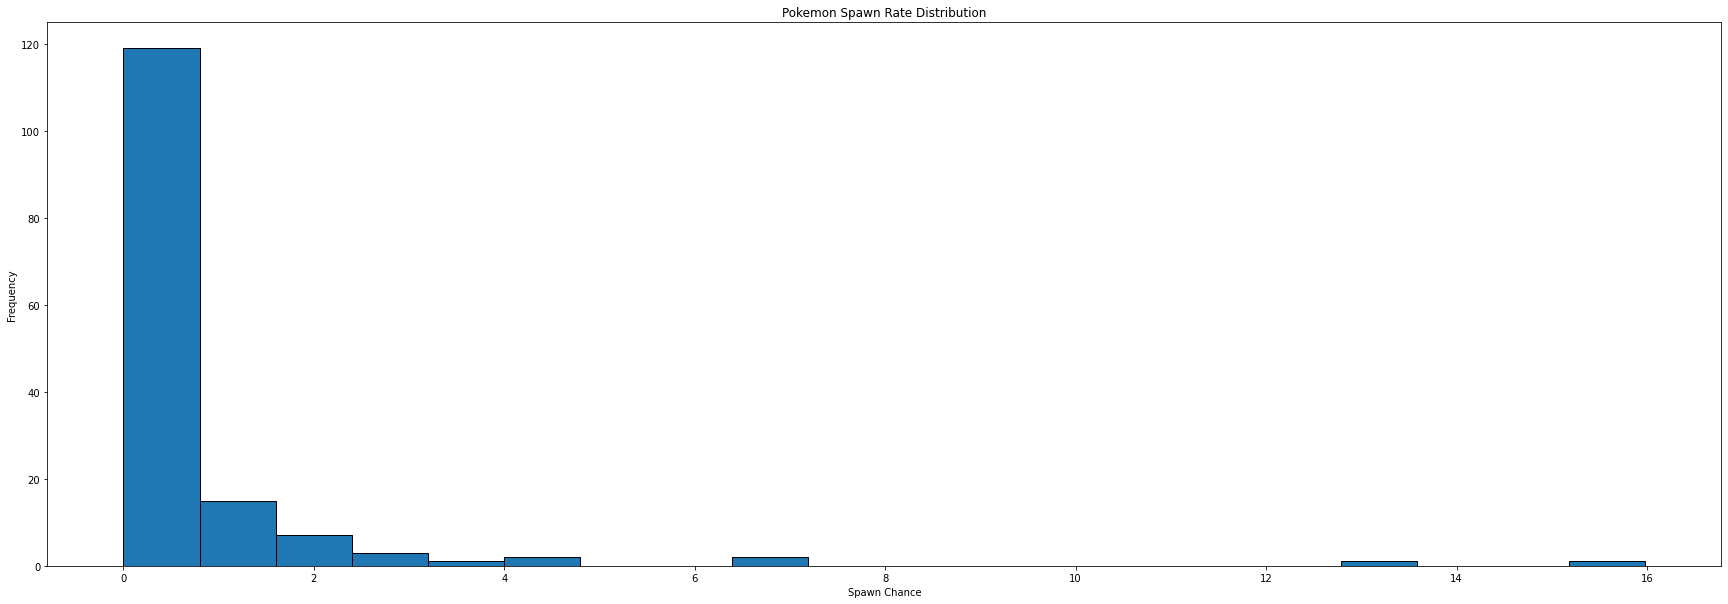

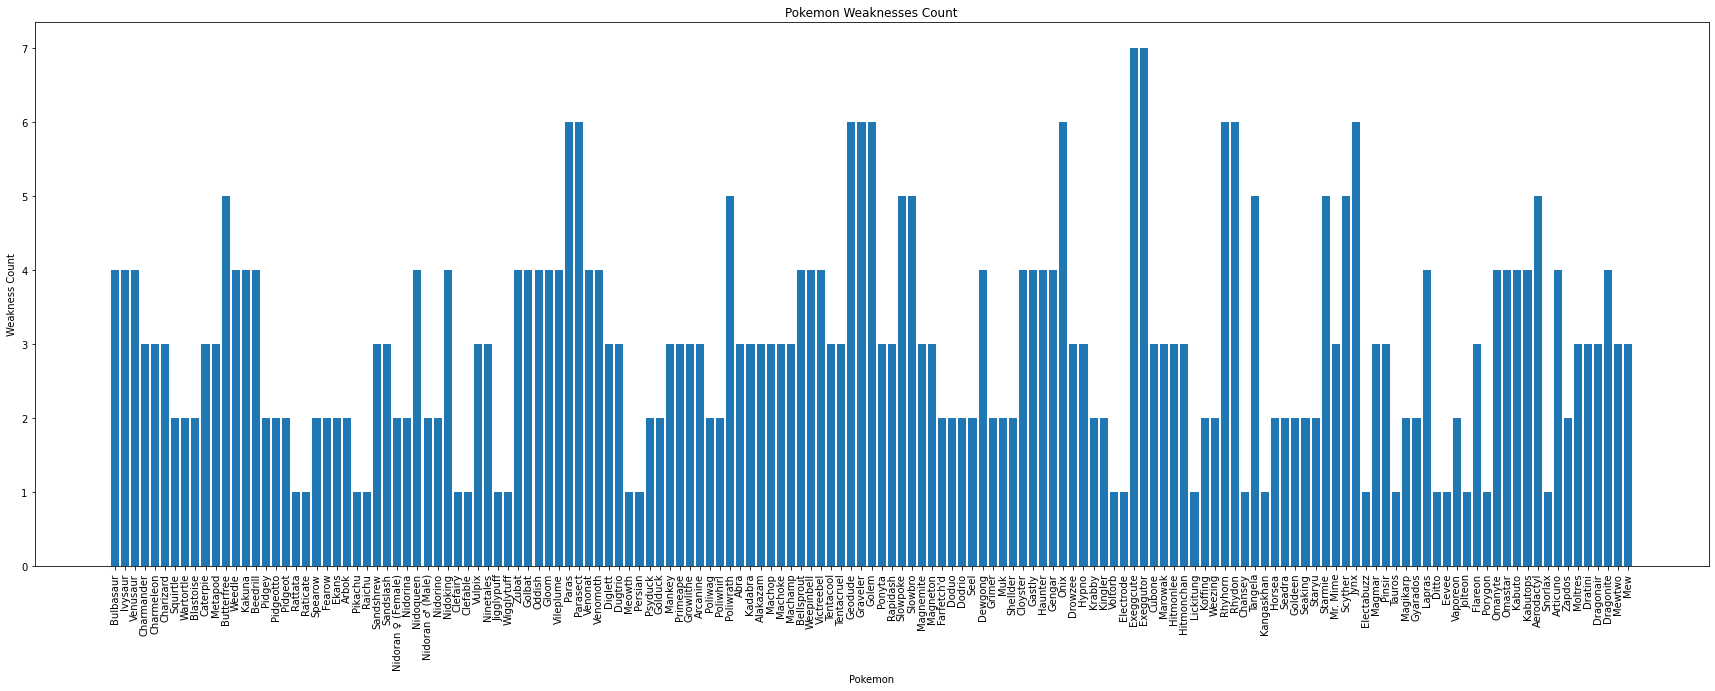

In [165]:
# Get all Pokemons whose spawn rate is less than 5%
spawn_rate_threshold = 5
low_spawn_rate_pokemons = df_pokemon_data[df_pokemon_data['Spawn Chance'] < spawn_rate_threshold]
print("Pokemons with spawn rate less than", spawn_rate_threshold, "%:")
print(low_spawn_rate_pokemons[['Name', 'Spawn Chance']])

# Get all Pokemons that have less than 4 weaknesses
weakness_threshold = 4
few_weakness_pokemons = df_pokemon_data[df_pokemon_data['Weaknesses'].apply(lambda x: len(x.split(','))) < weakness_threshold]
print("\nPokemons with less than", weakness_threshold, "weaknesses:")
print(few_weakness_pokemons[['Name', 'Weaknesses']])

# Get all Pokemons that have no multipliers at all
no_multiplier_pokemons = df_pokemon_data[df_pokemon_data['Multipliers'].isna()]
print("\nPokemons with no multipliers:")
print(no_multiplier_pokemons[['Name', 'Multipliers']])

# Get all Pokemons that do not have more than 2 evolutions
max_evolutions = 2
few_evolutions_pokemons = df_pokemon_data[df_pokemon_data['Next Evolution'].apply(lambda x: 0 if pd.isna(x) else len(x.split(','))) <= max_evolutions]
print("\nPokemons with", max_evolutions, "or fewer evolutions:")
print(few_evolutions_pokemons[['Name', 'Next Evolution']])

# Convert the spawn time to seconds and get all Pokemons whose spawn time is less than 300 seconds
df_pokemon_data['Spawn Time'] = pd.to_datetime(df_pokemon_data['Spawn Time'], format='%M:%S')
max_spawn_time = pd.to_datetime("00:05:00", format='%H:%M:%S')
low_spawn_time_pokemons = df_pokemon_data[df_pokemon_data['Spawn Time'] < max_spawn_time]
print("\nPokemons with spawn time less than 300 seconds:")
print(low_spawn_time_pokemons[['Name', 'Spawn Time']])

# Get all Pokemon who have more than two types of capabilities
num_capabilities_threshold = 2
multiple_capabilities_pokemons = df_pokemon_data[df_pokemon_data['Type'].apply(lambda x: len(x.split(','))) > num_capabilities_threshold]
print("\nPokemons with more than", num_capabilities_threshold, "types of capabilities:")
print(multiple_capabilities_pokemons[['Name', 'Type']])

# Plotting the data

# Spawn Rate Analysis
plt.figure(figsize=(30, 10))
plt.hist(df_pokemon_data['Spawn Chance'], bins=20, edgecolor='black')
plt.xlabel('Spawn Chance')
plt.ylabel('Frequency')
plt.title('Pokemon Spawn Rate Distribution')
plt.show()

# Weaknesses Analysis
df_pokemon_data['Weakness Count'] = df_pokemon_data['Weaknesses'].apply(lambda x: len(x.split(',')))
plt.figure(figsize=(30, 10))
plt.bar(df_pokemon_data['Name'], df_pokemon_data['Weakness Count'])
plt.xlabel('Pokemon')
plt.ylabel('Weakness Count')
plt.title('Pokemon Weaknesses Count')
plt.xticks(rotation='vertical')
plt.show()


Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all the Earth meteorites that fell before the year 2000
● Get all the earth meteorites co-ordinates who fell before the year 1970
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg



In [155]:

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df_meteorite_data= pd.read_csv("meteorite_data.csv")

In [159]:
df_meteorite_data.head()

,ID,Name,NameType,RecClass,Mass (g),Year,Latitude,Longitude,Coordinates
0,1,Aachen,Valid,L5,NaN,1880-01-01T00:00:00.000,50.77500,6.08333,"['50.775000', '6.083330']"
1,2,Aarhus,Valid,H6,NaN,1951-01-01T00:00:00.000,56.18333,10.23333,"['56.183330', '10.233330']"
2,6,Abee,Valid,EH4,NaN,1952-01-01T00:00:00.000,54.21667,-113.00000,"['54.216670', '-113.000000']"
3,10,Acapulco,Valid,Acapulcoite,NaN,1976-01-01T00:00:00.000,16.88333,-99.90000,"['16.883330', '-99.900000']"
4,370,Achiras,Valid,L6,NaN,1902-01-01T00:00:00.000,-33.16667,-64.95000,"['-33.166670', '-64.950000']"


In [160]:
df_meteorite_data.columns

Index(['ID', 'Name', 'NameType', 'RecClass', 'Mass (g)', 'Year', 'Latitude',
       'Longitude', 'Coordinates'],
      dtype='object')

Earth meteorites that fell before the year 2000:
Empty DataFrame
Columns: [Name, Year]
Index: []

Earth meteorites coordinates that fell before the year 1970:
Empty DataFrame
Columns: [Name, Latitude, Longitude]
Index: []

Earth meteorites with mass more than 10000 grams:
Empty DataFrame
Columns: [Name, Mass (g)]
Index: []


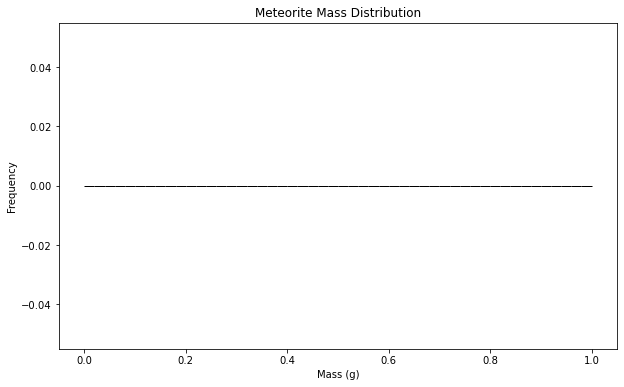

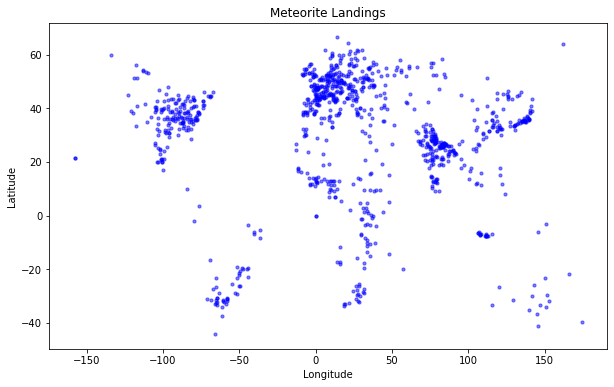

In [167]:
# Convert the 'Year' column to integer, handling missing values as NaN
df_meteorite_data['Year'] = pd.to_numeric(df_meteorite_data['Year'], errors='coerce')
# Get all the Earth meteorites that fell before the year 2000
earth_meteorites_before_2000 = df_meteorite_data[(df_meteorite_data['Year'].notna()) & (df_meteorite_data['Year'] < 2000) & (df_meteorite_data['NameType'] == 'Valid')]
print("Earth meteorites that fell before the year 2000:")
print(earth_meteorites_before_2000[['Name', 'Year']])

# Get all the Earth meteorites coordinates that fell before the year 1970
earth_meteorites_before_1970 = df_meteorite_data[(df_meteorite_data['Year'].notna()) & (df_meteorite_data['Year'] < 1970) & (df_meteorite_data['NameType'] == 'Valid')]
print("\nEarth meteorites coordinates that fell before the year 1970:")
print(earth_meteorites_before_1970[['Name', 'Latitude', 'Longitude']])

# Get all the Earth meteorites whose mass was more than 10000kg (assuming mass is in grams)
mass_threshold = 10000
high_mass_earth_meteorites = df_meteorite_data[(df_meteorite_data['Mass (g)'].notna()) & (df_meteorite_data['Mass (g)'] > mass_threshold) & (df_meteorite_data['NameType'] == 'Valid')]
print("\nEarth meteorites with mass more than", mass_threshold, "grams:")
print(high_mass_earth_meteorites[['Name', 'Mass (g)']])

# Plotting the data

# Distribution of meteorite masses
plt.figure(figsize=(10, 6))
plt.hist(df_meteorite_data['Mass (g)'].dropna(), bins=50, edgecolor='black')
plt.xlabel('Mass (g)')
plt.ylabel('Frequency')
plt.title('Meteorite Mass Distribution')
plt.show()

# Map of meteorite landings
plt.figure(figsize=(10, 6))
plt.scatter(df_meteorite_data['Longitude'].dropna(), df_meteorite_data['Latitude'].dropna(), color='blue', s=10, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Meteorite Landings')
plt.show()


Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season

In [168]:

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df_westworld_episodes = pd.read_csv("westworld_episodes.csv")

In [169]:
df_westworld_episodes.head()

,Episode ID,Season Number,Episode Number,Episode Name,Airdate,Airtime,Runtime,Average Rating,Summary,Medium Image,Original Image
0,869671,1,1,The Original,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,1,2,Chestnut,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,1,3,The Stray,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,1,4,Dissonance Theory,2016-10-23,21:00,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,1,5,Contrapasso,2016-10-30,21:00,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [170]:
df_westworld_episodes.columns

Index(['Episode ID', 'Season Number', 'Episode Number', 'Episode Name',
       'Airdate', 'Airtime', 'Runtime', 'Average Rating', 'Summary',
       'Medium Image', 'Original Image'],
      dtype='object')

Overall ratings for each season:
Season Number
1    8.0900
2    8.0000
3    7.7750
4    7.5375
Name: Average Rating, dtype: float64


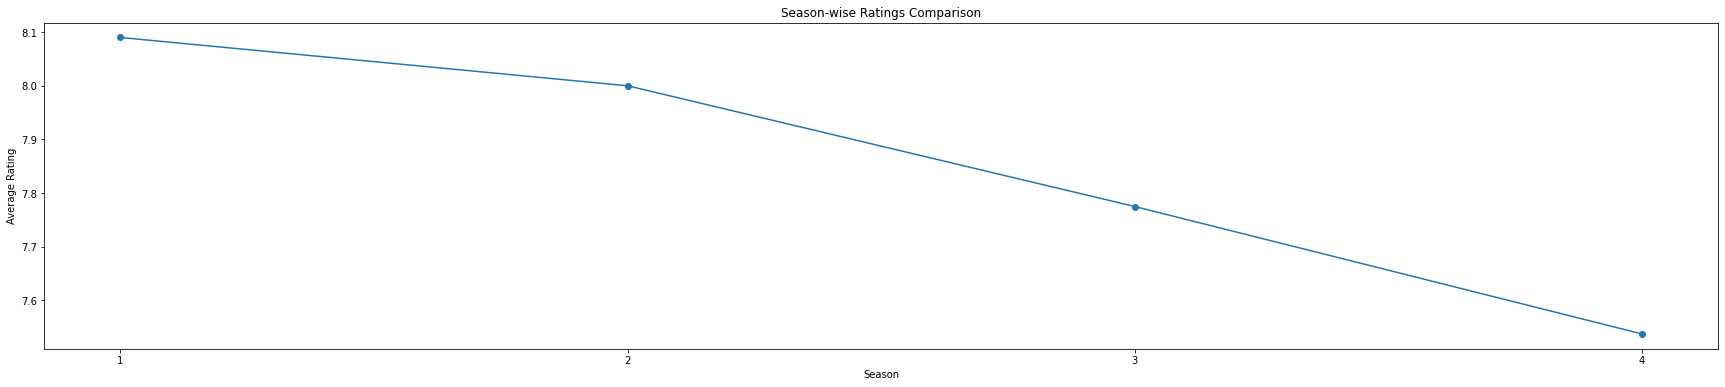


Episode names with an average rating greater than 8 for every season:
0                Trompe L'Oeil
1    The Well-Tempered Clavier
2           The Bicameral Mind
3                      Kiksuya
4              Vanishing Point
5                The Passenger
Name: Episode Name, dtype: object

Episode names that aired before May 2019:
0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorchés
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: Episode Name, dtype:

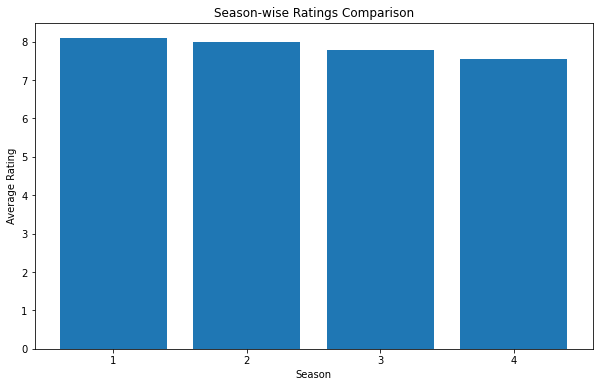

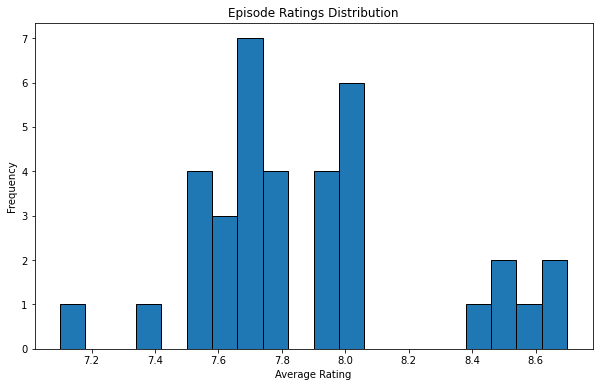

In [172]:
# Get all the overall ratings for each season and compare the ratings using plots
season_ratings = df_westworld_episodes.groupby('Season Number')['Average Rating'].mean()
print("Overall ratings for each season:")
print(season_ratings)

# Plotting the ratings for each season
plt.figure(figsize=(30, 6))
plt.plot(season_ratings.index, season_ratings.values, marker='o')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Season-wise Ratings Comparison')
plt.xticks(season_ratings.index)
plt.show()

# Get all the episode names with an average rating greater than 8 for every season
high_rating_episodes = df_westworld_episodes.groupby(['Season Number', 'Episode Number', 'Episode ID', 'Episode Name'])['Average Rating'].mean()
high_rating_episodes = high_rating_episodes[high_rating_episodes > 8]
print("\nEpisode names with an average rating greater than 8 for every season:")
print(high_rating_episodes.reset_index()['Episode Name'])

# Get all the episode names that aired before May 2019
df_westworld_episodes['Airdate'] = pd.to_datetime(df_westworld_episodes['Airdate'])
episodes_before_2019 = df_westworld_episodes[df_westworld_episodes['Airdate'] < pd.Timestamp(2019, 5, 1)]
print("\nEpisode names that aired before May 2019:")
print(episodes_before_2019['Episode Name'])

# Get the episode name from each season with the highest and lowest rating
highest_rating_episodes = df_westworld_episodes.groupby('Season Number')['Average Rating'].idxmax()
lowest_rating_episodes = df_westworld_episodes.groupby('Season Number')['Average Rating'].idxmin()
highest_rating_episodes_info = df_westworld_episodes.loc[highest_rating_episodes, ['Season Number', 'Episode Name', 'Average Rating']]
lowest_rating_episodes_info = df_westworld_episodes.loc[lowest_rating_episodes, ['Season Number', 'Episode Name', 'Average Rating']]
print("\nEpisode with the highest rating in each season:")
print(highest_rating_episodes_info[['Season Number', 'Episode Name', 'Average Rating']])
print("\nEpisode with the lowest rating in each season:")
print(lowest_rating_episodes_info[['Season Number', 'Episode Name', 'Average Rating']])

# Get the summary for the most popular (highest ratings) episode in every season
most_popular_episodes = df_westworld_episodes.groupby('Season Number').apply(lambda x: x.loc[x['Average Rating'].idxmax(), 'Summary'])
print("\nSummary for the most popular episode in each season:")
print(most_popular_episodes)

# Plotting the data

# Season-wise Ratings Comparison
plt.figure(figsize=(10, 6))
plt.bar(season_ratings.index, season_ratings.values)
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Season-wise Ratings Comparison')
plt.xticks(season_ratings.index)
plt.show()

# Episode Ratings Distribution
plt.figure(figsize=(10, 6))
plt.hist(df_westworld_episodes['Average Rating'], bins=20, edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Episode Ratings Distribution')
plt.show()


Question 9:
Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -
1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
Insights to be drawn -
● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
● Get all TESLA cars with the model year, and model type made in Bothell City.
● Get all the cars that have an electric range of more than 100, and were made after
2015
● Draw plots to show the distribution between city and electric vehicle type

In [173]:

import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the URL
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df_car = pd.read_csv(url)

In [174]:
df_car.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [175]:
df_car.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

Cars and their types that do not qualify for clean alternative fuel vehicle:
Empty DataFrame
Columns: [Make, Electric Vehicle Type]
Index: []

TESLA cars with model year and model type made in Bothell City:
Empty DataFrame
Columns: [Make, Model Year, Model]
Index: []

Cars with an electric range of more than 100 and made after 2015:
          Make  Electric Range  Model Year
0        TESLA             238        2018
2        TESLA             220        2019
4        TESLA             210        2017
12       TESLA             308        2020
13       TESLA             322        2020
...        ...             ...         ...
130417   TESLA             291        2020
130428  NISSAN             151        2018
130432   TESLA             291        2020
130436   TESLA             215        2018
130441   TESLA             293        2020

[34066 rows x 3 columns]


<Figure size 7200x2160 with 0 Axes>

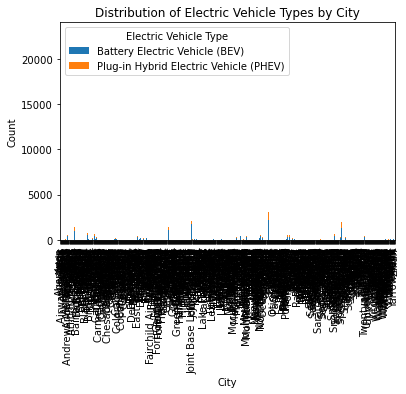

In [176]:
# Get all cars and their types that do not qualify for clean alternative fuel vehicle
non_qualifying_cars = df_car[df_car['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'N']
non_qualifying_cars_info = non_qualifying_cars[['Make', 'Electric Vehicle Type']]
print("Cars and their types that do not qualify for clean alternative fuel vehicle:")
print(non_qualifying_cars_info)

# Get all TESLA cars with the model year, and model type made in Bothell City
tesla_cars_bothell = df_car[(df_car['Make'] == 'TESLA') & (df_car['City'] == 'BOTHELL')]
tesla_cars_info = tesla_cars_bothell[['Make', 'Model Year', 'Model']]
print("\nTESLA cars with model year and model type made in Bothell City:")
print(tesla_cars_info)

# Get all cars with an electric range of more than 100 and made after 2015
electric_cars_range_100 = df_car[(df_car['Electric Range'] > 100) & (df_car['Model Year'] > 2015)]
electric_cars_info = electric_cars_range_100[['Make', 'Electric Range', 'Model Year']]
print("\nCars with an electric range of more than 100 and made after 2015:")
print(electric_cars_info)

# Draw plots to show the distribution between city and electric vehicle type
plt.figure(figsize=(100, 30))
df.groupby(['City', 'Electric Vehicle Type']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicle Types by City')
plt.legend(title='Electric Vehicle Type')
plt.show()


Question 10 -
Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or
paragraph, and return their respective count as a dictionary.
Note -
1. Write code comments wherever required for code
2. You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

In [109]:
""""def count_pos_tags(text):
    # Define the list of part-of-speech tags for verbs, nouns, pronouns, and adjectives
    verb_tags = ["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]
    noun_tags = ["NN", "NNS", "NNP", "NNPS"]
    pronoun_tags = ["PRP", "PRP$", "WP", "WP$"]
    adjective_tags = ["JJ", "JJR", "JJS"]

    # Split the text into words
    words = text.split()

    # Initialize counts for verbs, nouns, pronouns, and adjectives
    verb_count = 0
    noun_count = 0
    pronoun_count = 0
    adjective_count = 0

    # Iterate through each word and count the occurrences of each part-of-speech
    for word in words:
        # Convert the word to lowercase for case-insensitive matching
        word = word.lower()

        # Check if the word has a verb tag
        if any(tag in word for tag in verb_tags):
            verb_count += 1

        # Check if the word has a noun tag
        if any(tag in word for tag in noun_tags):
            noun_count += 1

        # Check if the word has a pronoun tag
        if any(tag in word for tag in pronoun_tags):
            pronoun_count += 1

        # Check if the word has an adjective tag
        if any(tag in word for tag in adjective_tags):
            adjective_count += 1

    # Create a dictionary with the counts of each part-of-speech
    pos_counts = {
        'Verbs': verb_count,
        'Nouns': noun_count,
        'Pronouns': pronoun_count,
        'Adjectives': adjective_count
    }

    return pos_counts
""""


In [113]:
def count_pos_tags(text):
    # Define the list of pronouns
    pronouns = ["I", "you", "he", "she", "it", "we", "they", "me", "you", "him", "her", "us", "them"]

    # Initialize counts for verbs, nouns, pronouns, and adjectives
    verb_count = 0
    noun_count = 0
    pronoun_count = 0
    adjective_count = 0

    # Split the text into words
    words = text.split()

    # Iterate through each word and count the occurrences of each part-of-speech
    for word in words:
        # Remove punctuation marks from the word
        word = word.strip(".,!?")

        # Check if the word is a verb
        if word.endswith("ed") or word.endswith("ing"):
            verb_count += 1

        # Check if the word is a noun
        if word[0].isupper():
            noun_count += 1

        # Check if the word is a pronoun
        if word.lower() in pronouns:
            pronoun_count += 1

        # Check if the word is an adjective
        if word.endswith("able") or word.endswith("ful") or word.endswith("ous"):
            adjective_count += 1

    # Create a dictionary with the counts of each part-of-speech
    pos_counts = {
        'Verbs': verb_count,
        'Nouns': noun_count,
        'Pronouns': pronoun_count,
        'Adjectives': adjective_count
    }

    return pos_counts

# Example test cases
text1 = "The cat sat on the mat."
text2 = "I love eating pizza."

# Count the POS tags in the given texts
pos_counts1 = count_pos_tags(text1)
pos_counts2 = count_pos_tags(text2)

# Print the counts for each POS tag
print("POS counts for text 1:")
print(pos_counts1)
print("\nPOS counts for text 2:")
print(pos_counts2)


POS counts for text 1:
{'Verbs': 0, 'Nouns': 1, 'Pronouns': 0, 'Adjectives': 0}

POS counts for text 2:
{'Verbs': 1, 'Nouns': 1, 'Pronouns': 0, 'Adjectives': 0}
